# Business Problem

Following dataset aims at determining, if the patient coming in for cancer pre-screening has a Benign or Malignant Tumor. The analysis is done using Decision Tree, with the help of confusion matrix

There is one Dependent Variable:

Diagnosis- Malinant(M)/ Benign(B)

And 30 Independent Variables:
Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.



In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\nandi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read dataset to pandas dataframe
df= pd.read_csv('./Dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
df.loc[(df==0).any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
101,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559
136,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865
224,871642,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164
225,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116
278,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592
279,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938
290,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.0,0.0,...,10.490,34.24,66.50,330.6,0.10730,0.07158,0.0,0.0,0.2475,0.06969
330,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151
362,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743
391,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.0,0.0,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0,0.0,0.1566,0.05905


Replacing the Zeroes with NaN

In [4]:
df = df.replace(0, np.nan)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


Most of the features are right skewed as observed from the histogram

In [6]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
nam = pp.ProfileReport(df)
nam.to_file('BC.html')
display(IFrame('BC.html', width=900, height=350))

In [7]:
#Identify how many classes we have

df.diagnosis.unique()

array(['B', 'M'], dtype=object)

Checking for Null Values
There are 13 rows with NaN valueas and they are dropped from the original dataset

In [8]:
#Checking for Null Values
df.isnull().sum()

id                    0
diagnosis             0
radius_mean           0
texture_mean          0
perimeter_mean        0
area_mean             0
smoothness_mean       0
compactness_mean      0
concavity_mean       13
points_mean          13
symmetry_mean         0
dimension_mean        0
radius_se             0
texture_se            0
perimeter_se          0
area_se               0
smoothness_se         0
compactness_se        0
concavity_se         13
points_se            13
symmetry_se           0
dimension_se          0
radius_worst          0
texture_worst         0
perimeter_worst       0
area_worst            0
smoothness_worst      0
compactness_worst     0
concavity_worst      13
points_worst         13
symmetry_worst        0
dimension_worst       0
dtype: int64

In [23]:
df = df.dropna(how='any', axis=0).reset_index(drop = True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
552,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
553,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
554,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


Checking for Outliers and removing them as presence can skew the data and might bias the predictions.


In [24]:
#Tukey Method- Outliers

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(df.drop('diagnosis',axis=1),0,list(df.drop('diagnosis',axis=1)))
df.drop('diagnosis',axis=1).loc[Outliers_to_drop]

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.12660,0.1242,0.09391,0.2827,0.06771
17,89511502,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,...,13.71,21.10,88.70,574.4,0.1384,0.12120,0.1020,0.05602,0.2688,0.06888
18,89263202,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,...,23.68,29.43,158.80,1696.0,0.1347,0.33910,0.4932,0.19230,0.3294,0.09469
42,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.6869,0.25750,0.6638,0.17300
46,90769601,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,853612,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,...,16.82,28.12,119.40,888.7,0.1637,0.57750,0.6956,0.15460,0.4761,0.14020
503,9012315,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,...,19.38,31.03,129.30,1165.0,0.1415,0.46650,0.7087,0.22480,0.4824,0.09614
216,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.52490,0.5355,0.17410,0.3985,0.12440
320,864877,15.78,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.09479,0.2096,...,20.19,30.50,130.30,1272.0,0.1855,0.49250,0.7356,0.20340,0.3274,0.12520


In [25]:
#Create New Dataset without Outliers
dataset = df.drop(df.index[Outliers_to_drop]).reset_index(drop = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 342 non-null    int64  
 1   diagnosis          342 non-null    object 
 2   radius_mean        342 non-null    float64
 3   texture_mean       342 non-null    float64
 4   perimeter_mean     342 non-null    float64
 5   area_mean          342 non-null    float64
 6   smoothness_mean    342 non-null    float64
 7   compactness_mean   342 non-null    float64
 8   concavity_mean     342 non-null    float64
 9   points_mean        342 non-null    float64
 10  symmetry_mean      342 non-null    float64
 11  dimension_mean     342 non-null    float64
 12  radius_se          342 non-null    float64
 13  texture_se         342 non-null    float64
 14  perimeter_se       342 non-null    float64
 15  area_se            342 non-null    float64
 16  smoothness_se      342 non

In [26]:
#Show Key Statistics
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,3.420000e+02,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,...,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,2.473856e+06,13.492570,18.454649,87.173099,581.259064,0.093120,0.086514,0.061333,0.036507,0.172937,...,15.217158,24.724094,99.509503,742.842690,0.128659,0.212391,0.216158,0.097866,0.278087,0.079754
std,3.295483e+06,2.538113,3.866609,17.168469,232.076789,0.012034,0.034270,0.048454,0.025450,0.020463,...,3.329313,5.555515,22.678162,347.035501,0.020236,0.105138,0.145173,0.049384,0.042806,0.012359
min,8.670000e+03,8.571000,9.710000,54.340000,221.300000,0.062510,0.019380,0.000692,0.001852,0.116700,...,9.473000,12.020000,59.900000,273.900000,0.081250,0.034320,0.001845,0.008772,0.178300,0.057370
25%,8.661130e+05,11.760000,15.797500,75.495000,427.450000,0.084465,0.059713,0.026720,0.018870,0.159000,...,13.052500,20.507500,84.170000,520.700000,0.113750,0.142125,0.106325,0.062735,0.247150,0.070398
50%,9.010195e+05,13.050000,18.120000,84.115000,524.500000,0.091885,0.081035,0.046605,0.028655,0.171750,...,14.430000,24.590000,94.330000,634.000000,0.128900,0.188950,0.186200,0.086055,0.274550,0.078090
75%,9.215795e+05,14.755000,20.570000,95.715000,668.675000,0.101750,0.108875,0.084220,0.050727,0.187575,...,16.555000,28.212500,110.175000,841.050000,0.142575,0.262425,0.302025,0.128700,0.306450,0.087545
max,9.113778e+06,20.640000,29.810000,137.800000,1335.000000,0.125700,0.189300,0.254500,0.125900,0.245900,...,25.700000,40.540000,166.800000,1972.000000,0.187800,0.611000,0.772700,0.254300,0.412800,0.120500


Class Split
B    256
M     86
Name: diagnosis, dtype: int64


Text(0, 0.5, 'Count')

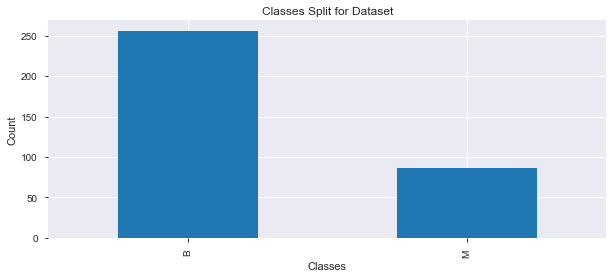

In [27]:
#Class Balance
print('Class Split')
print(dataset['diagnosis'].value_counts())
dataset['diagnosis'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

In [28]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(dataset,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('perimeter_mean', 'radius_mean'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('concavity_mean', 'compactness_mean'), ('points_mean', 'concavity_mean'), ('perimeter_se', 'radius_se'), ('area_se', 'area_mean'), ('area_se', 'radius_se'), ('area_se', 'perimeter_se'), ('concavity_se', 'compactness_se'), ('radius_worst', 'radius_mean'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'area_mean'), ('radius_worst', 'area_se'), ('texture_worst', 'texture_mean'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'perimeter_mean'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'points_mean'), ('perimeter_worst', 'area_se'), ('perimeter_worst', 'radius_worst'), ('area_worst', 'radius_mean'), ('area_worst', 'perimeter_mean'), ('area_worst', 'area_mean'), ('area_worst', 'area_se'), ('area_worst', 'radius_worst'), ('area_worst', 'perimeter_worst'), ('compactness_worst', 'compactness_mean'), ('concavity_worst', 'concavity_mean'), ('co

Features that are displayed in Dark Blue are highly correlated

<AxesSubplot:>

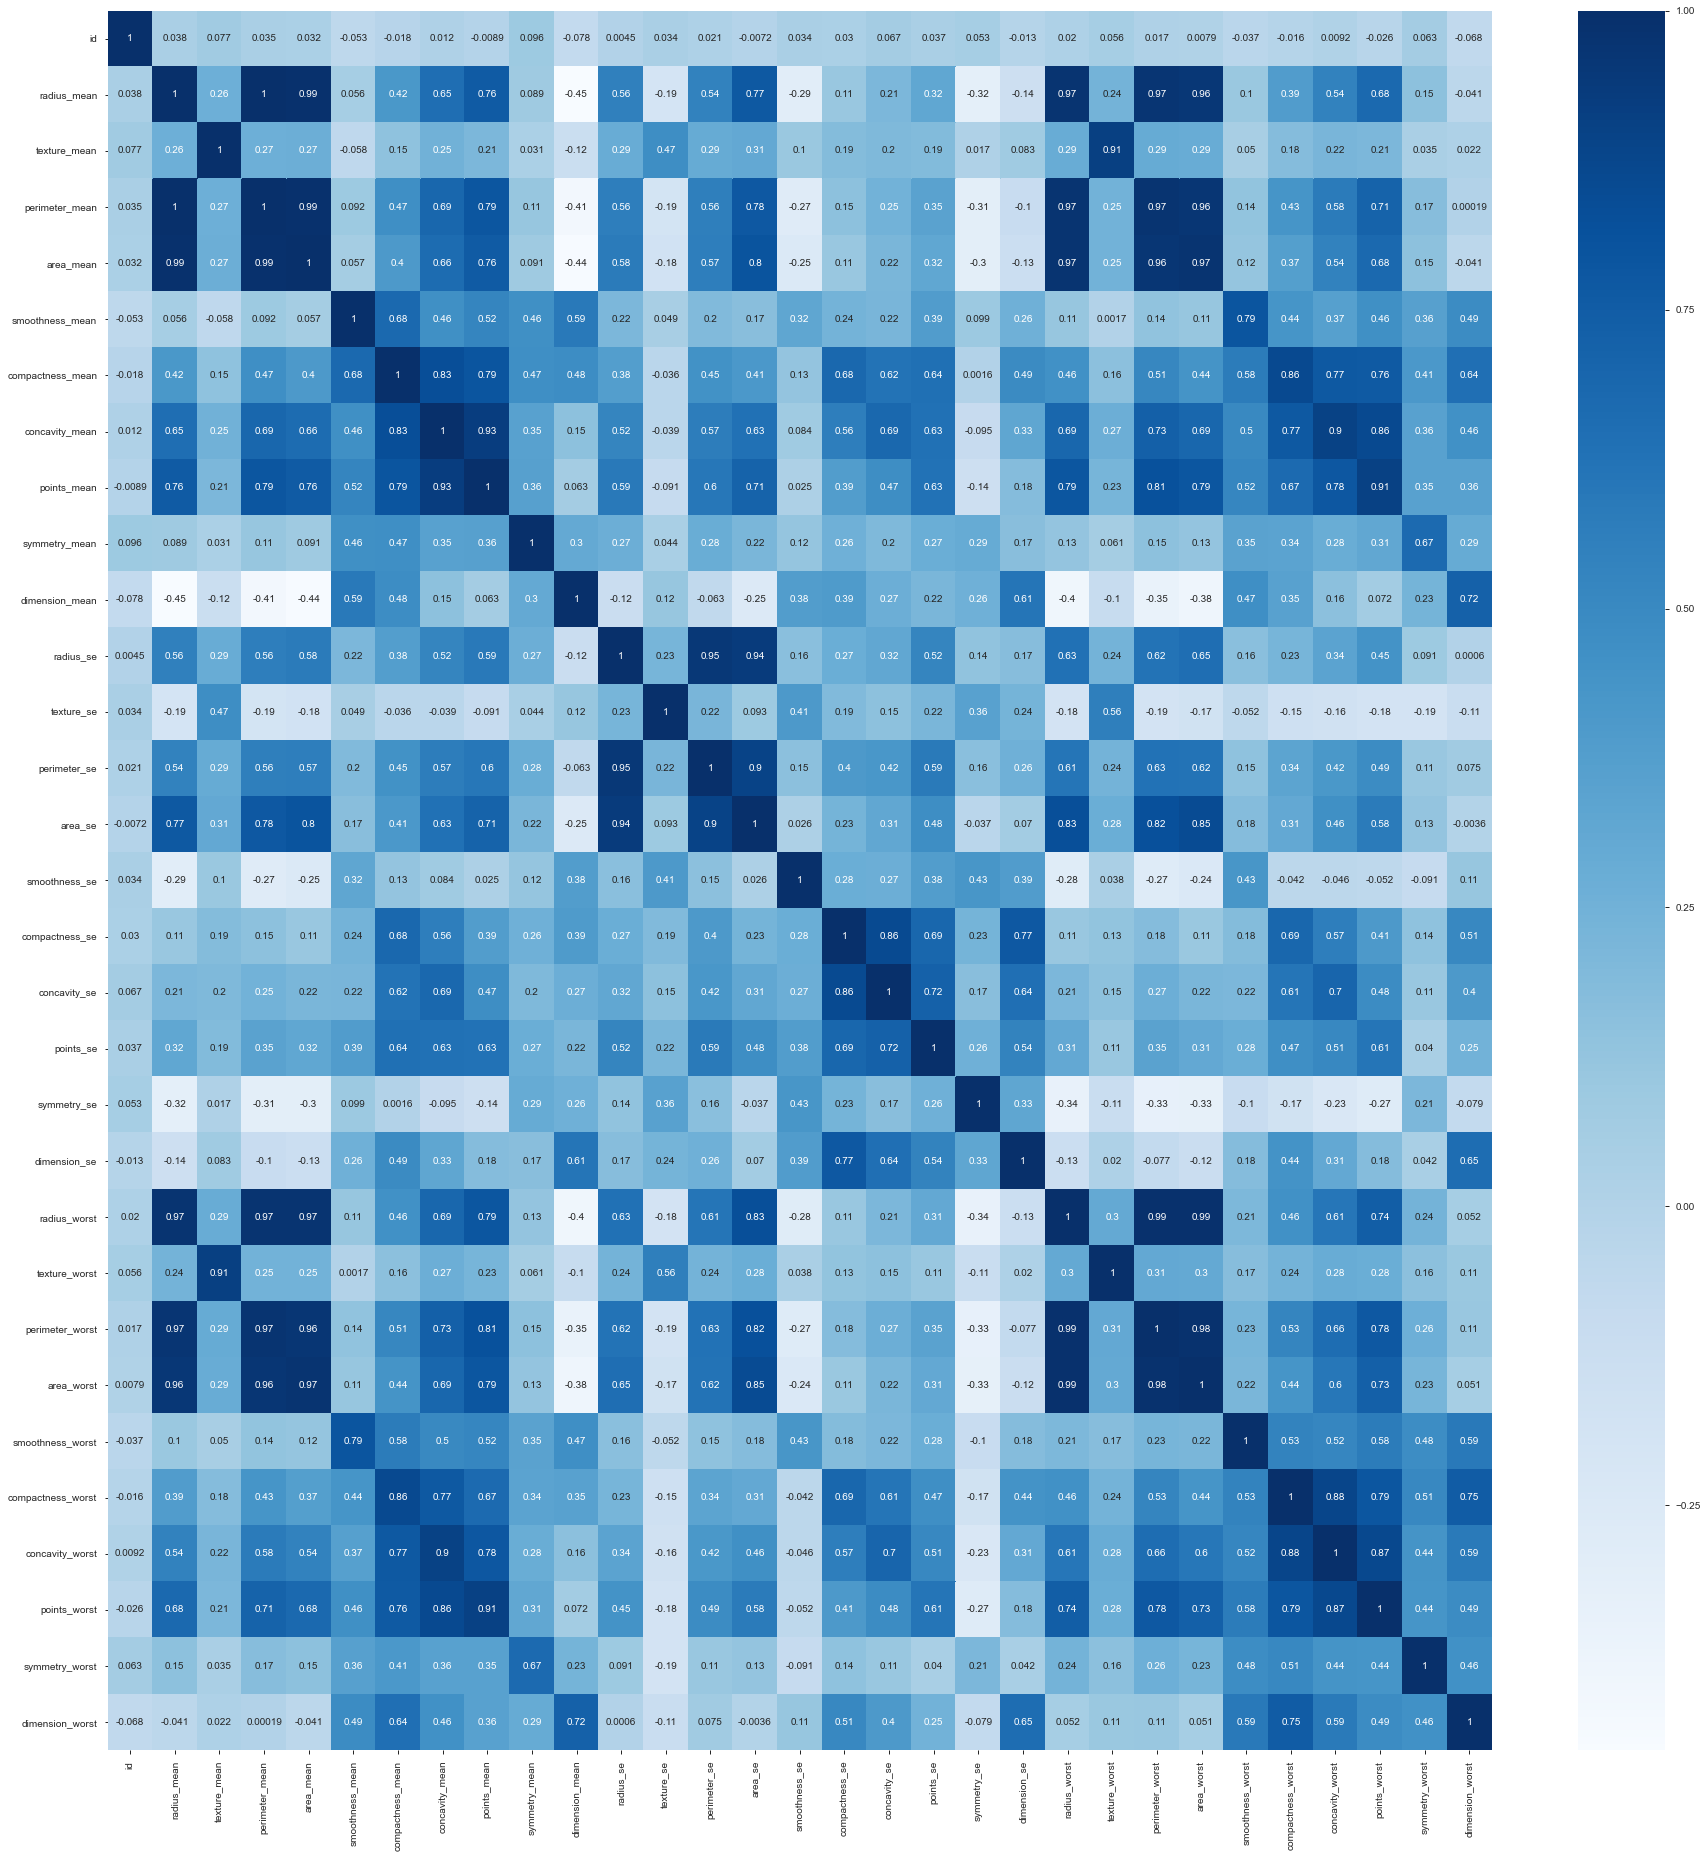

In [29]:
# Visualization of Correlations
fig = plt.figure(figsize=(31,32))
sns.heatmap(dataset.corr(),annot=True,cmap="Blues")

Test Data is taken to be 20 % of the total data size "test_size=0.20"

In [30]:
#Assign data from first 4 columns to X variable
x=df.drop(['diagnosis','id'],axis=1).values
y=df['diagnosis'].values

#Train the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, stratify=y, test_size=0.20,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

x_2 = sc.fit_transform(x)

#Import Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

The models that are implemeted to study the data, are:
1. Decision Tree
2. Random Forest 
3. KNN

These models are pipelined using sklearn.pipeline to analyse the resultes siultaneously

In [31]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline
alpha=0.5
pipeline =[]


pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])
pipeline.insert(0,pipe_rdf)

pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('clf', DecisionTreeClassifier(random_state=100))])
pipeline.insert(1,pipe_dt)

pipe_knn= Pipeline([('scl', StandardScaler(copy=True, with_mean=True, with_std=True)),
                    ('clf',KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=2, p=2,
                                      weights='uniform'))])
pipeline.insert(2,pipe_knn)

# Set grid search params 

modelpara =[]

param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': ['auto', 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara.insert(0,param_gridrdf)

max_depth = range(1,100)
param_griddt = {'clf__criterion':['gini','entropy'],
                'clf__max_depth':max_depth}
modelpara.insert(1,param_griddt)

k_range = range(1, 10)
param_gridknn= { 'clf__n_neighbors': k_range,
                'clf__algorithm' : ['auto','ball_tree','kd_tree','brute'],
                'clf__weights' : ['uniform','distance']}
modelpara.insert(2,param_gridknn)

# Learning Curve

Learning curves are plots of the model’s performance on the training set and the validation set as a function of the training set size.
Performance of a model is determined by the gap between the training and validation curve, which is also called as the Variance.
If the gap reduces with the increase in sample size, it implies that the model is performing well on the given data

In [32]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',
                                                            n_jobs=1,random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.6, 1.5])
    plt.show()
    train_scores_mean = train_scores.mean(axis = 1)
    test_scores_mean = test_scores.mean(axis = 1)
    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) # separator
    print('\nMean validation scores\n\n',pd.Series(test_scores_mean, index = train_sizes))

As seen from the learning curves of all the models:
1. For decision tree and random forest, the training curve is flat, however for validation curve, the recall for Randon forest has increased more than decision tree.
2. Overall, KNN is better than DT and RF as the training and validation curve are convergong towarda the end which means that the variance is low and hence the model is becoming better at predicting the type of cancer

Decision Tree - Learning Curve


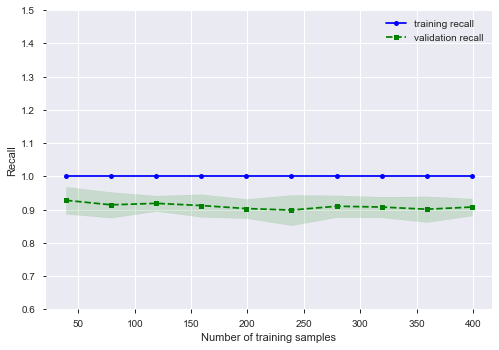

Mean training scores

 39     1.0
79     1.0
119    1.0
159    1.0
199    1.0
239    1.0
279    1.0
319    1.0
359    1.0
399    1.0
dtype: float64

 --------------------

Mean validation scores

 39     0.927973
79     0.914334
119    0.918831
159    0.912218
199    0.903122
239    0.898576
279    0.910092
319    0.907667
359    0.901102
399    0.907615
dtype: float64

Random Forest - Learning Curve


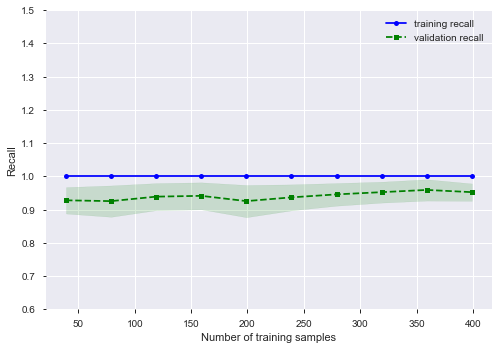

Mean training scores

 39     1.0
79     1.0
119    1.0
159    1.0
199    1.0
239    1.0
279    1.0
319    1.0
359    1.0
399    1.0
dtype: float64

 --------------------

Mean validation scores

 39     0.927922
79     0.925496
119    0.938983
159    0.941409
199    0.925549
239    0.936811
279    0.945803
319    0.952465
359    0.959183
399    0.952516
dtype: float64

KNN - Learning Curve


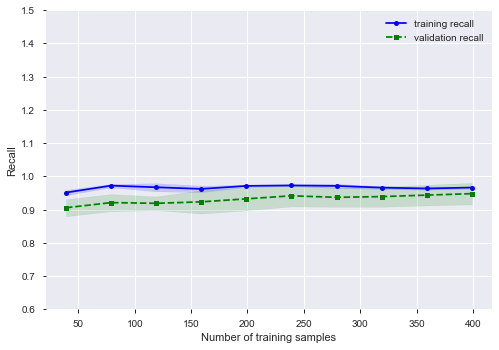

Mean training scores

 39     0.951282
79     0.972152
119    0.967227
159    0.962264
199    0.971357
239    0.972803
279    0.971326
319    0.966144
359    0.963510
399    0.966416
dtype: float64

 --------------------

Mean validation scores

 39     0.905549
79     0.920998
119    0.918932
159    0.923326
199    0.932367
239    0.941513
279    0.936917
319    0.939139
359    0.943584
399    0.948028
dtype: float64


In [33]:
#Plot Learning Curve

print('Decision Tree - Learning Curve')
plot_learning_curves(pipe_dt)
print('\nRandom Forest - Learning Curve')
plot_learning_curves(pipe_rdf)
print('\nKNN - Learning Curve')
plot_learning_curves(pipe_knn)

From Model Analysis, KNN and Random forest have the same accuracy score 

Model Evaluation - Accuracy Score
Decision Tree 0.93 +/- 0.03
Random Forest 0.96 +/- 0.03
KNN 0.95 +/- 0.02




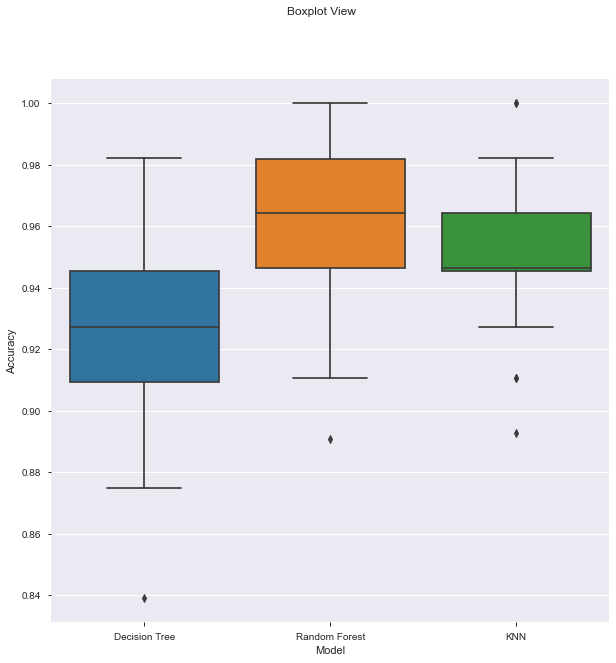

In [34]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]

models.append(('Decision Tree',pipe_dt))
models.append(('Random Forest',pipe_rdf))
models.append(('KNN',pipe_knn))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

fig = plt.figure(figsize=(10,10))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [35]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=1, cv=cv2,scoring='accuracy')
    gs_clf = gs_clf.fit(x_train2, y_train)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoreACC = cross_val_score(gs_clf, x_2, y, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, x_2, y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, x_2, y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred)) 
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))
    print('\n')    

# Random Forest


According to the confusion Matrix:
1. For Benign Tumor:
        Out of 69, 68 were correctly predicted to be benign and 1 was wrongly predicted to be Malignant, hence the recall
        is 68/69, i.e., 99%
        Also, out of 69 that were predicted to be Benign, only 68 were correctly predicted, the rest 1 was actually 
        Malignant, hence the precision is 68/69, i.e., 99%

2. For Malignant Tumor:
        Out of 43, 42 were correctly predicted to be Malignant and 1 was wrongly predicted to be Benign, hence the recall
        is 42/43, i.e., 98%
        Also, out of 43 that were predicted to be Malignant, only 42 were correctly predicted, the rest 1 was actually 
        Benign, hence the precision is 42/43, i.e., 98%
        
Predicting Malignant as Benign is called as a Type 2 error and that is what the model should focus on minimizing

# Decision Tree


According to the confusion Matrix:
1. For Benign Tumor:
        Out of 69, 68 were correctly predicted to be benign and 1 was wrongly predicted to be Malignant, hence the recall
        is 68/69, i.e., 99%
        Also, out of 74 that were predicted to be Benign, only 68 were correctly predicted, the rest 6 were actually 
        Malignant, hence the precision is 68/74, i.e., 92%

2. For Malignant Tumor:
        Out of 43, 37 were correctly predicted to be Malignant and 6 were wrongly predicted to be Benign, hence the recall
        is 37/43, i.e., 86%
        Also, out of 38 that were predicted to be Malignant, only 37 were correctly predicted, the rest 1 was actually 
        Benign, hence the precision is 37/38, i.e., 97%
        
Predicting Malignant as Benign is called as a Type 2 error and that is what the model should focus on minimizing
The type 2 error for Decision Tree are higher that Random forest 

# KNN 


According to the confusion Matrix:
1. For Benign Tumor:
        Out of 69, 68 were correctly predicted to be benign and 1 was wrongly predicted to be Malignant, hence the recall
        is 68/69, i.e., 99%
        Also, out of 70 that were predicted to be Benign, only 68 were correctly predicted, the rest 2 were actually 
        Malignant, hence the precision is 68/70, i.e., 97%

2. For Malignant Tumor:
        Out of 43, 41 were correctly predicted to be Malignant and 2 were wrongly predicted to be Benign, hence the recall
        is 41/43, i.e., 95%
        Also, out of 42 that were predicted to be Malignant, only 41 were correctly predicted, the rest 1 was actually 
        Benign, hence the precision is 41/42, i.e., 98%
        
Predicting Malignant as Benign is called as a Type 2 error and that is what the model should focus on minimizing
The type 2 error are less than Decision Tree but are more than Random Forest.

# Hence, if deciding which model is better then, it should be Random Forest, KNN and then Decision Tree

In [36]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

Best Parameters: {'clf__bootstrap': False, 'clf__max_features': 'auto', 'clf__n_estimators': 200}

 [[68  1]
 [ 1 42]]

               precision    recall  f1-score   support

           B       0.99      0.99      0.99        69
           M       0.98      0.98      0.98        43

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112


NestedCV Accuracy(weighted) :0

In [37]:
#Feature Importance
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

for name, model in models:
    print(name)
    x_train2 = sc.fit_transform(x_train)
    x_test2 = sc.fit_transform(x_test)
    perm=PermutationImportance(model.fit(x_train2,y_train),random_state=100).fit(x_test2,y_test)
    features=dataset.drop(['diagnosis','id'], axis=1).columns
    print('\nPermutation Importance')
    print('\n')
    df=eli5.show_weights(perm,feature_names=dataset.drop(['diagnosis','id'], axis=1).columns.tolist())
    display(df)
    df2= pd.DataFrame(data=perm.results_,columns=features)
    fig = plt.figure(figsize=(15,5))
    plt.show()

Decision Tree

Permutation Importance




Weight,Feature
0.1375 ± 0.0474,points_worst
0.1179 ± 0.0484,area_worst
0.0821 ± 0.0484,area_se
0.0464 ± 0.0208,concavity_mean
0.0125 ± 0.0087,texture_worst
0 ± 0.0000,compactness_worst
0 ± 0.0000,smoothness_mean
0 ± 0.0000,compactness_mean
0 ± 0.0000,points_mean
0 ± 0.0000,symmetry_mean


<Figure size 1080x360 with 0 Axes>

Random Forest

Permutation Importance




Weight,Feature
0.0036 ± 0.0087,texture_mean
0.0018 ± 0.0071,texture_worst
0.0018 ± 0.0071,concavity_se
0 ± 0.0000,dimension_se
0 ± 0.0000,smoothness_mean
0 ± 0.0000,smoothness_worst
0 ± 0.0000,symmetry_mean
0 ± 0.0000,symmetry_worst
0 ± 0.0000,radius_mean
0 ± 0.0000,compactness_se


<Figure size 1080x360 with 0 Axes>

KNN

Permutation Importance




Weight,Feature
0.0357 ± 0.0226,texture_worst
0.0196 ± 0.0208,symmetry_mean
0.0179 ± 0.0113,smoothness_worst
0.0161 ± 0.0175,radius_worst
0.0161 ± 0.0134,area_worst
0.0161 ± 0.0237,smoothness_mean
0.0125 ± 0.0182,perimeter_worst
0.0107 ± 0.0175,concavity_mean
0.0089 ± 0.0160,concavity_worst
0.0089 ± 0.0000,radius_mean


<Figure size 1080x360 with 0 Axes>

As evident from the Feature Importance Table, the common feature highlighte by all the three models is "texture_worst" for predicting the kind of tumor